<!-- Data Preprocessing -->

Before beginning, do note that throughout the way, you may see that I suddenly dropped the variable **duration** as it was stated that **duration** is only to be used as a benchmark when assessing the performance of the models.

## Data Preprocessing 
Comprises the checking for null values and anomaly values. From there, I will decide whether to remove certain values or columns.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

df = pd.read_csv("C:/Users/user/Downloads/archive (1)/bank-additional-full.csv", sep = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
# First we check the dimension of the dataframe.
df.shape
# We can see that the dataframe has 41188 instances and 21 columns.

(41188, 21)

In [3]:
# Now check the number of null values
df.isnull().sum()
# There are supposedly 0 null values for all columns. However, from bannk-additional-names.txt, we can see that certain cols
# (eg categorical columns) have missing values labelled with "unknown" label and hence will not be captured using the code 
# above

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
# So, we will keep track of the categorical columns from the numerical columns
# From what can be seen, 
# Categorical columns : job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
# Numerical outcomes : age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

# Do note that we have to remove the campaign column when training the actual model as the column should only be used for 
# bench marking purposes 

<AxesSubplot:>

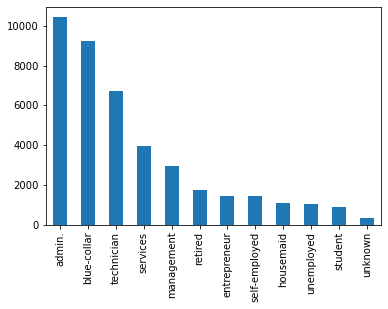

In [5]:
# Checking for "unknown" values in categorical columns - have to replace the missing values if need be
# Categorical columns : job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
df['job'].value_counts().plot.bar()

<AxesSubplot:>

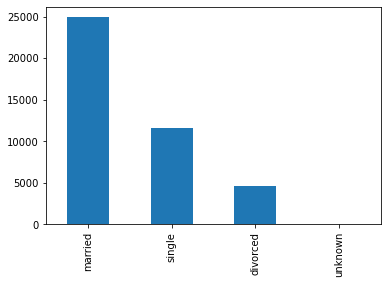

In [6]:
df['marital'].value_counts().plot.bar()

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41188, dtype: object

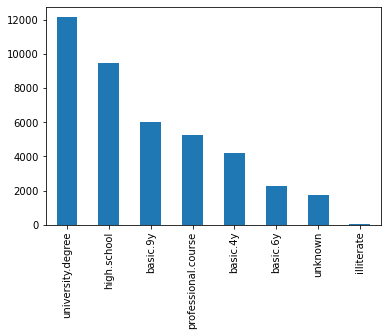

In [7]:
df['education'].value_counts().plot.bar()
df['education'].value_counts().index[0]
(df['education'])

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

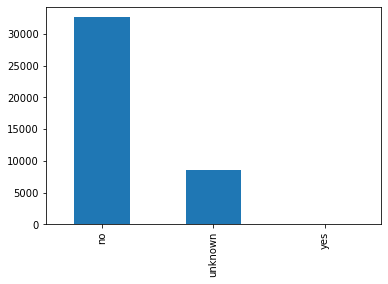

In [8]:
df['default'].value_counts().plot.bar()
df['default'].value_counts()
# We see that the number of "unknown" values are in the 10k region. As such, I will not remove any instances

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

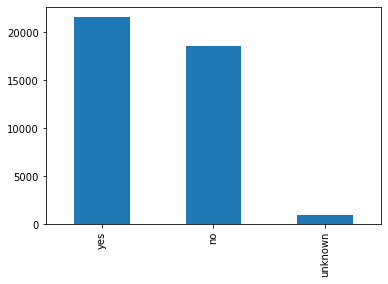

In [9]:
df['housing'].value_counts().plot.bar()
df['housing'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

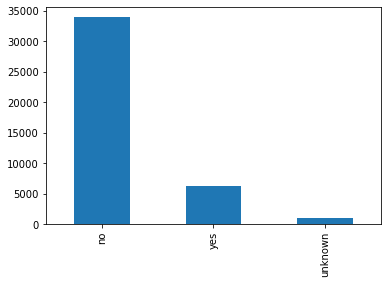

In [10]:
df['loan'].value_counts().plot.bar()
df['loan'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

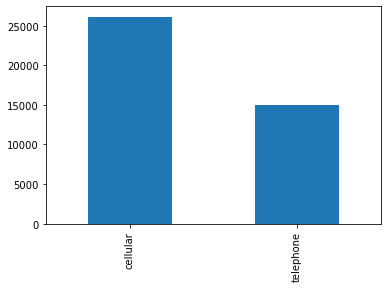

In [11]:
df['contact'].value_counts().plot.bar()
df['contact'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

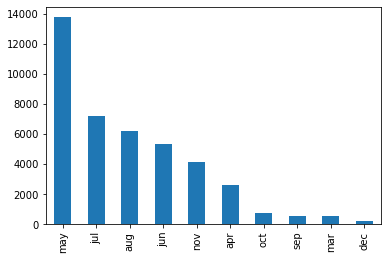

In [12]:
df['month'].value_counts().plot.bar()
df['month'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

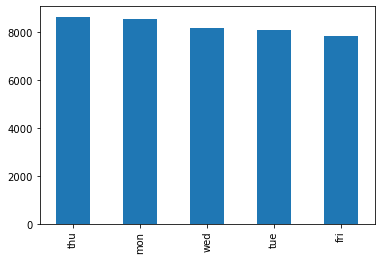

In [13]:
df['day_of_week'].value_counts().plot.bar()
df['day_of_week'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

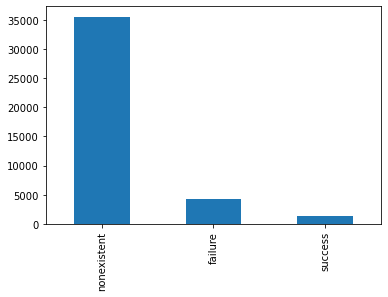

In [14]:
df['poutcome'].value_counts().plot.bar()
df['poutcome'].value_counts()

In [15]:
# Replace the "unknown" (aka NA) entries with the mode for categorical columns
categorical_col = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
top_word = []
for col in categorical_col:
    top_word.append(df[col].value_counts().index[0])

for i in range(len(categorical_col)):
    new_df = df[categorical_col[i]]
    new_df = new_df.replace("unknown",top_word[i])
    df[categorical_col[i]] = new_df
# We can possibly remove the default column as the frequency of no outnumber the frequency of yes by a lot.  

In [16]:
# dealing with continuous variables now
# continuous variables : age, duration, campaign, pdays, previous, emp.var.rate, con.price.idx, cons.conf.idx, euribor3m, 
# nr.employed

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


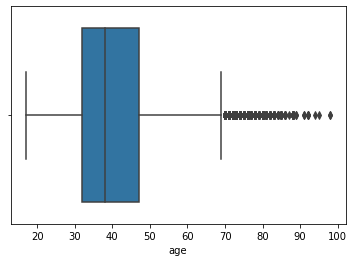

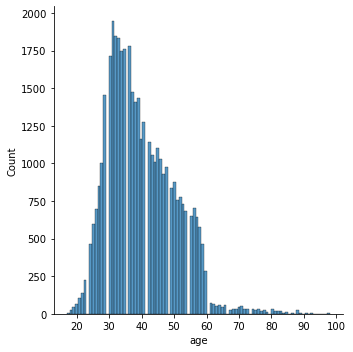

In [17]:
# Checking for anomalies
sns.boxplot(x = df['age'])
print(df['age'].unique())
# df[df['age'] > 70]
# There are no serious issues with the "anomalies"

# Checking distribution for age column
sns.displot(df, x = 'age')

[ 261  149  226 ... 1246 1556 1868]


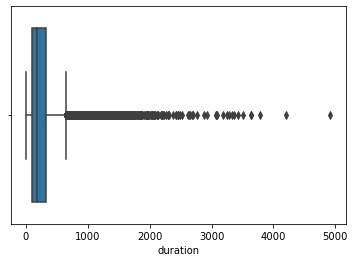

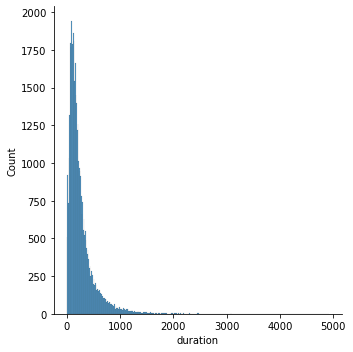

In [18]:
sns.boxplot(x = df['duration'])
print(df['duration'].unique())
# df[df['duration'] > 4000]
# There are 2 points that appear to be outliers, but there does not seem to be an issue

# Checking distribution for duration column
sns.displot(df, x = 'duration')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


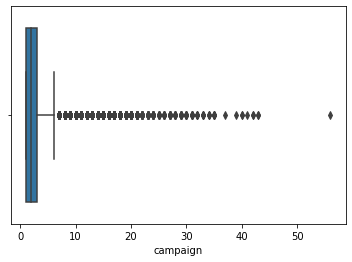

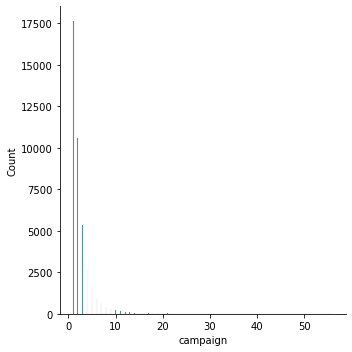

In [19]:
sns.boxplot(x = df['campaign'])
print(df['campaign'].unique())
# df[df['campaign'] > 50]
# There does not seem to be an issue with the outlier. I will leave it there

# Checking distribution for campaign column
sns.displot(df, x = 'campaign')

[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


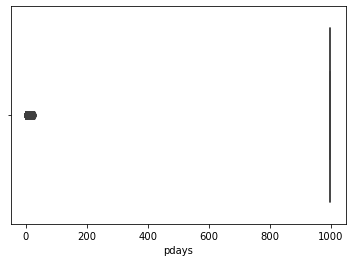

In [20]:
sns.boxplot(x = df['pdays'])
print(df['pdays'].unique())
df['pdays'].value_counts()
# Since number of 999 is high, I will remove pdays column from the dataframe
df = df.drop(['pdays'], axis = 1)

[0 1 2 3 4 5 6 7]


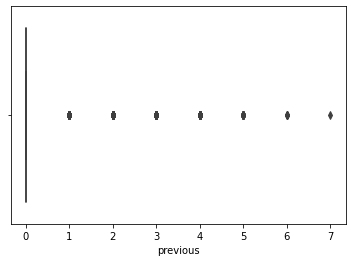

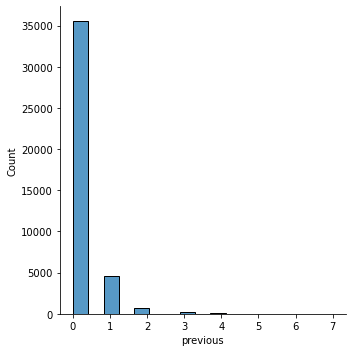

In [21]:
sns.boxplot(x = df['previous'])
print(df['previous'].unique())

# Checking distribution for previous column
sns.displot(df, x = 'previous')

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


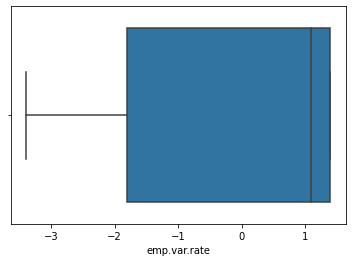

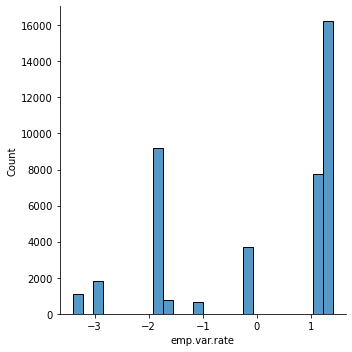

In [22]:
# emp.var.rate, con.price.idx, cons.conf.idx, euribor3m, 
sns.boxplot(x = df['emp.var.rate'])
print(df['emp.var.rate'].unique())

# Checking distribution for emp.var.rate column
sns.displot(df, x = 'emp.var.rate')

[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


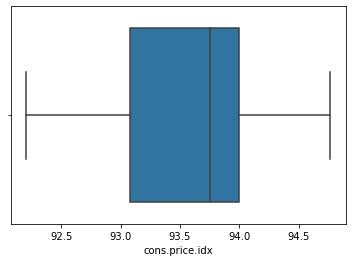

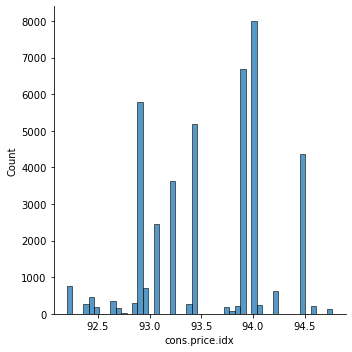

In [23]:
sns.boxplot(x = df['cons.price.idx'])
print(df['cons.price.idx'].unique())

# Checking distribution for cons.price.idx column
sns.displot(df, x = 'cons.price.idx')

[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


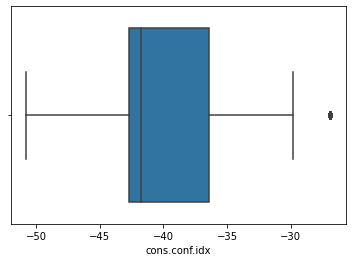

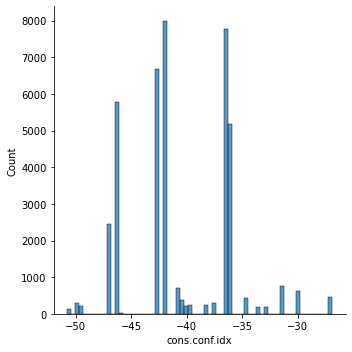

In [24]:
sns.boxplot(x = df['cons.conf.idx'])
print(df['cons.conf.idx'].unique())

# Checking distribution for cons.conf.idx column
sns.displot(df, x = 'cons.conf.idx')

[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.813 0.809 0.803 

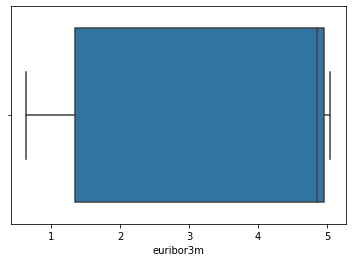

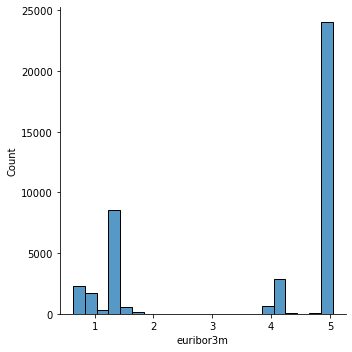

In [25]:
sns.boxplot(x = df['euribor3m'])
print(df['euribor3m'].unique())

# Checking distribution for euribor3m column
sns.displot(df, x = 'euribor3m')

[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]


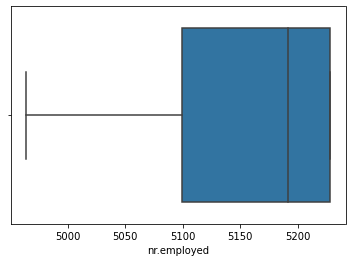

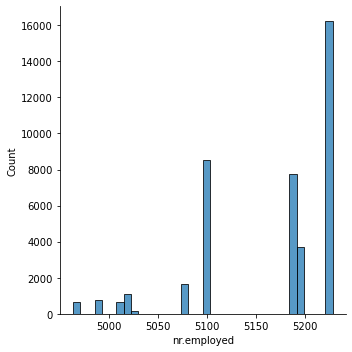

In [26]:
sns.boxplot(x = df['nr.employed'])
print(df['nr.employed'].unique())

# Checking distribution for nr.employed column
sns.displot(df, x = 'nr.employed')

In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
# One-hot encoding of categorical variables
# drop first is used so that there will be a decreased chance of multicollinearity occurring - if we have k columns, we just
# need (k-1) columns to deduce the information contained in the kth column
categorical_col = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
job_dummy = pd.get_dummies(df['job'], drop_first = True)
marital_dummy = pd.get_dummies(df['marital'], drop_first = True)
education_dummy = pd.get_dummies(df['education'], drop_first = True)
default_dummy = pd.get_dummies(df['default'], drop_first = True)
housing_dummy = pd.get_dummies(df['housing'], drop_first = True)
loan_dummy = pd.get_dummies(df['loan'], drop_first = True)
contact_dummy = pd.get_dummies(df['contact'], drop_first = True)
month_dummy = pd.get_dummies(df['month'], drop_first = True)
day_of_week_dummy = pd.get_dummies(df['day_of_week'], drop_first = True)
poutcome_dummy = pd.get_dummies(df['poutcome'], drop_first = True)

# remove the one-hot encoded categorical columns first - want to standardise the continuous columns
categorical_one_hot = pd.concat([job_dummy, marital_dummy, education_dummy, default_dummy, housing_dummy, loan_dummy, 
                                 contact_dummy, month_dummy, day_of_week_dummy, poutcome_dummy], axis = 1)
categorical_one_hot

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [29]:
df = df.drop(categorical_col, axis = 1)
df

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [30]:
df = df.replace("no","0")
df = df.replace("yes", "1")
y = df['y']
y = pd.to_numeric(y)
df = df.drop(['y'], axis = 1)
df

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6


<AxesSubplot:>

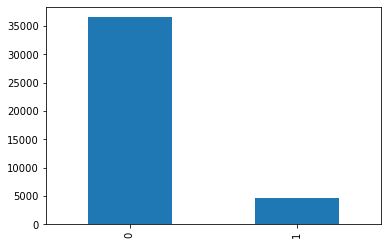

In [31]:
y.value_counts().plot.bar()
# From the histogram, it seems that the number of 0 is a lot more than the number of 1. As such, accuracy is not a good
# metric to use to assess the model's performance

<!-- Data Splitting -->

## Data Splitting 
Dataset is split into training, validation and testing data in the following proportion (60-20-20)

In [32]:
df = pd.concat([df, categorical_one_hot],axis = 1)
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(df, y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.25)

In [33]:
# Scaling the continuous variables in the training set using standardisation
train_continuous_df = X_train.iloc[:,:9]
train_categorical_df = X_train.iloc[:,9:]
# Since the continuous columns are of different units, I will conduct Standardisation so that they are of the same scales
sc = StandardScaler()
train_scaled_df = pd.DataFrame(sc.fit_transform(train_continuous_df))
train_scaled_df.columns = train_continuous_df.columns
train_scaled_df.index = train_continuous_df.index
train_df_intermediate = pd.concat([train_scaled_df, train_categorical_df], axis = 1)
train_df_intermediate.iloc[:,9:] = train_df_intermediate.iloc[:,9:].astype('category')
train_df_intermediate

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
12119,-0.094479,-0.216287,-0.573440,-0.353494,0.846363,1.538475,-0.280936,0.771673,0.849599,0,...,0,0,0,0,1,0,0,0,1,0
11991,0.193740,-0.350640,2.003681,-0.353494,0.846363,1.538475,-0.280936,0.777994,0.849599,0,...,0,0,0,0,0,0,0,1,1,0
2664,-0.094479,-0.415898,-0.205280,-0.353494,0.656222,0.727615,0.878663,0.721110,0.340305,0,...,1,0,0,0,0,0,0,1,1,0
20304,-0.959134,2.313389,2.371841,-0.353494,0.846363,-0.219250,0.943085,0.782016,0.849599,0,...,0,0,0,0,1,0,0,0,1,0
5666,-0.574843,-0.623185,0.162880,-0.353494,0.656222,0.727615,0.878663,0.719961,0.340305,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29094,-0.670916,1.023599,-0.573440,-0.353494,-1.181814,-0.854509,-1.419062,-1.263481,-0.921262,0,...,0,0,0,0,0,0,0,0,1,0
18079,-0.574843,-0.293060,-0.573440,-0.353494,0.846363,0.596775,-0.474203,0.780867,0.849599,0,...,0,0,0,0,0,0,0,1,1,0
19176,-0.574843,3.714499,-0.205280,-0.353494,0.846363,-0.219250,0.943085,0.783739,0.849599,0,...,0,0,0,0,0,0,1,0,1,0
15961,-0.766989,0.240513,0.162880,-0.353494,0.846363,0.596775,-0.474203,0.779143,0.849599,0,...,0,0,0,0,1,0,0,0,1,0


## Feature Selection 
I will be using the correlation between the variables and the information gain to decide which variables I will be keeping.

<AxesSubplot:>

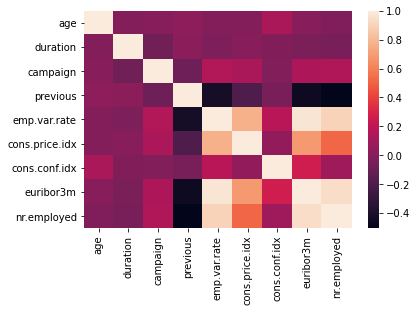

In [34]:
sns.heatmap(train_df_intermediate.corr())
# train_full_intermediate
# We can see that certain features are quite highly correlated. Namely, emp.var.rate, cons.price.idx, cons.conf.idx and 
# nr.employed are highly correlated. As such, I will utilise information gain to determine the features that should be 
# removed

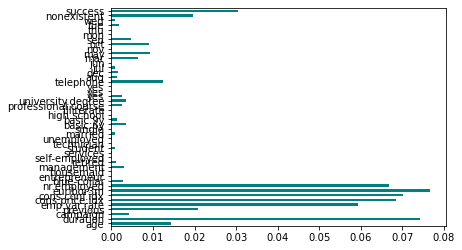

In [35]:
# Using information to decide what features to keep on a global scale.
importance = mutual_info_classif(train_df_intermediate, y_train)
feat_importance = pd.Series(importance, train_df_intermediate.columns[0:len(train_df_intermediate.columns)])
feat_importance.plot(kind = 'barh', color = 'teal')
plt.show()
# emp.var.rate - 5th from bottom
# cons.price.idx - 6th from bottom
# cons.conf.idx - 7th from bottom
# euribor3m - 8th from bottom
# euribor3m contributes the most information gain followed by cons.conf.idx. As such, I will drop emp.var.rate for now

<AxesSubplot:>

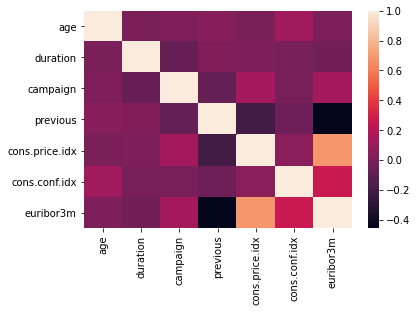

In [36]:
train_df_intermediate = train_df_intermediate.drop(['emp.var.rate', 'nr.employed'], axis = 1)
sns.heatmap(train_df_intermediate.corr())

In [37]:
train_df_intermediate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24712 entries, 12119 to 36382
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  24712 non-null  float64 
 1   duration             24712 non-null  float64 
 2   campaign             24712 non-null  float64 
 3   previous             24712 non-null  float64 
 4   cons.price.idx       24712 non-null  float64 
 5   cons.conf.idx        24712 non-null  float64 
 6   euribor3m            24712 non-null  float64 
 7   blue-collar          24712 non-null  category
 8   entrepreneur         24712 non-null  category
 9   housemaid            24712 non-null  category
 10  management           24712 non-null  category
 11  retired              24712 non-null  category
 12  self-employed        24712 non-null  category
 13  services             24712 non-null  category
 14  student              24712 non-null  category
 15  technician     

In [38]:
# Scaling the continuous variables in the validation set using standardisation
val_continuous_df = X_val.iloc[:,:9]
val_categorical_df = X_val.iloc[:,9:]
sc = StandardScaler()
val_scaled_df = pd.DataFrame(sc.fit_transform(val_continuous_df))
val_scaled_df.columns = val_continuous_df.columns
val_scaled_df.index = val_continuous_df.index
val_df_intermediate = pd.concat([val_scaled_df, val_categorical_df], axis = 1)
val_df_intermediate.iloc[:,9:] = val_df_intermediate.iloc[:,9:].astype('category')
val_df_intermediate

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
12105,-1.640727,-0.664847,0.849822,-0.340952,0.829634,1.526267,-0.272382,0.757826,0.840918,0,...,0,0,0,0,1,0,0,0,1,0
38076,-1.254690,-0.315804,-0.199988,3.726773,-2.241373,-2.084059,2.362032,-1.652797,-2.100942,0,...,0,0,0,1,0,0,1,0,0,0
881,-1.254690,-0.351501,-0.199988,-0.340952,0.637696,0.711088,0.913104,0.705308,0.322670,1,...,1,0,0,0,0,0,0,1,1,0
23377,0.772004,-0.736243,-0.199988,-0.340952,0.829634,-0.240820,0.978965,0.767637,0.840918,0,...,0,0,0,0,0,0,0,1,1,0
24558,-0.000070,-0.288039,-0.549924,-0.340952,-0.130056,-0.663120,-0.316289,0.321524,0.389721,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21450,1.158040,0.168097,-0.549924,-0.340952,0.829634,-0.240820,0.978965,0.767060,0.840918,0,...,0,0,0,0,0,0,1,0,1,0
24189,0.289457,-0.637083,-0.549924,-0.340952,-0.130056,-0.663120,-0.316289,0.321524,0.389721,0,...,0,1,0,0,1,0,0,0,1,0
12448,0.289457,-0.050055,-0.549924,-0.340952,0.829634,0.579552,-0.469963,0.765328,0.840918,0,...,0,0,0,0,1,0,0,0,1,0
16710,-0.000070,0.104635,0.149949,-0.340952,0.829634,0.579552,-0.469963,0.767060,0.840918,0,...,0,0,0,0,0,0,0,1,1,0


In [39]:
# Scaling the continuous variables in the testing set using standardisation
test_continuous_df = X_test.iloc[:,:9]
test_categorical_df = X_test.iloc[:,9:]
sc = StandardScaler()
test_scaled_df = pd.DataFrame(sc.fit_transform(test_continuous_df))
test_scaled_df.columns = test_continuous_df.columns
test_scaled_df.index = test_continuous_df.index
test_df_intermediate = pd.concat([test_scaled_df, test_categorical_df], axis = 1)
test_df_intermediate.iloc[:,9:] = test_df_intermediate.iloc[:,9:].astype('category')
test_df_intermediate

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
5286,-0.206295,-0.284812,-0.561248,-0.346068,0.634174,0.719779,0.883946,0.696649,0.314504,0,...,1,0,0,0,0,0,0,0,1,0
4623,1.410334,1.745418,-0.561248,-0.346068,0.634174,0.719779,0.883946,0.696066,0.314504,0,...,1,0,0,0,0,0,1,0,1,0
29586,-0.206295,1.334039,-0.561248,1.737927,-1.227735,-0.882307,-1.435097,-1.313492,-0.978569,0,...,0,0,0,0,1,0,0,0,0,0
40780,0.078993,-0.326711,-0.561248,1.737927,-0.778309,1.077154,0.645540,-1.619788,-2.885113,0,...,0,0,0,1,0,0,0,1,0,1
12211,-0.871966,-0.589537,-0.561248,-0.346068,0.826785,0.587289,-0.481472,0.754298,0.836517,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,-0.967062,-0.547637,-0.561248,-0.346068,0.634174,0.719779,0.883946,0.695484,0.314504,1,...,1,0,0,0,0,0,0,0,1,0
34937,-1.062158,-0.738090,0.495244,1.737927,-1.227735,-1.199586,-1.240038,-1.403750,-0.978569,1,...,1,0,0,0,0,0,0,0,0,0
14719,0.364280,-0.757135,0.847407,-0.346068,0.826785,0.587289,-0.481472,0.757209,0.836517,0,...,0,0,0,0,0,0,1,0,1,0
29707,-2.013116,-0.212440,-0.561248,1.737927,-1.227735,-0.882307,-1.435097,-1.313492,-0.978569,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# I will remove the corresponding columns since I removed those in the training set
train_df_intermediate = train_df_intermediate.drop(['duration'], axis = 1)
val_df_intermediate = val_df_intermediate.drop(['emp.var.rate', 'nr.employed', 'duration'], axis = 1)
test_df_intermediate = test_df_intermediate.drop(['emp.var.rate', 'nr.employed', 'duration'], axis = 1)


## Model training : Train using the training set and validate using the validation set

In [41]:
svc = SVC(kernel = 'rbf',C = 3)
svc.fit(train_df_intermediate, y_train)
y_pred = svc.predict(val_df_intermediate)
f1_score(pd.DataFrame(y_val), pd.DataFrame(y_pred), pos_label = 1)
# '''Using duration in the dataset as benchmark'''
# 0.512 for C = 5 using poly kernel
# 0.507 for C = 7 using poly kernel
# 0.508 for C = 9 using poly kernel
# 0.508 for C = 11 using poly kernel

# 0.552 for C = 3 using rbf kernel
# 0.539 for C = 5 using rbf kernel
# 0.536 for C = 7 using rbf kernel
# 0.540 for C = 9 using rbf kernel
# 0.539 for C = 11 using rbf kernel
# 0.537 for C = 13 using rbf kernel

# '''Without duration in dataset'''
# 0.338 for C = 3 using rbf kernel
# 

0.3380753138075314

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 135, max_depth = 35)
rf.fit(train_df_intermediate, y_train)
y_pred = rf.predict(val_df_intermediate)
f1_score(pd.DataFrame(y_val), pd.DataFrame(y_pred), pos_label = 1)
# '''Using duration in the dataset as benchmark'''
# 0.570 for n_estimators = 125 and max_depth = 30
# 0.561 for n_estimators = 130 and max_depth = 30
# 0.563 for n_estimators = 130 and max_depth = 35
# 0.572 for n_estimators = 135 and max_depth = 30
# 0.575 for n_estimators = 135 and max_depth = 35
# 0.574 for n_estimators = 140 and max_depth = 30
# 0.560 for n_estimators = 140 and max_depth = 35
# n_estimators = 130 and max_depth = 35 gives the best results 

# '''Without duration in dataset'''
# 0.356 for n_estimators 135 and max_depth = 35

0.3560830860534125

In [43]:
from sklearn.neighbors import KNeighborsClassifier
n_choices = [1,3,5,7,9,11,13,15,17,19,21,23,25]
fin = []
for i in n_choices:
    model2 = KNeighborsClassifier(n_neighbors = i)
    model2.fit(train_df_intermediate, y_train)
    y_pred = model2.predict(val_df_intermediate)
    score = f1_score(pd.DataFrame(y_val), pd.DataFrame(y_pred), pos_label = 1)
    toap = [i, score]
    fin.append(toap)

print(fin)
# '''using duration in dataset as benchmark'''
# [[1, 0.46569178852643417], [3, 0.4973102211595936], [5, 0.4897706137631743], [7, 0.48245054243777924], 
#  [9, 0.4696774193548387], [11, 0.47911227154047004], [13, 0.4680290046143704], [15, 0.46194926568758343], 
# [17, 0.46626586506346024], [19, 0.4646194926568758], [21, 0.45768449559918756], [23, 0.45442176870748296], 
# [25, 0.45997286295793754]]
# Best number of neighbors is 3

# '''without duration in dataset'''
# [[1, 0.2934537246049661], [3, 0.3444444444444445], [5, 0.35450516986706054], [7, 0.35456638526477363], 
# [9, 0.3413127413127413], [11, 0.34042553191489355], [13, 0.33598726114649685], [15, 0.33064516129032256], 
# [17, 0.32006498781478476], [19, 0.3078189300411523], [21, 0.30282861896838603], [23, 0.2993311036789298], 
# [25, 0.30511316010058676]]

[[1, 0.2934537246049661], [3, 0.3444444444444445], [5, 0.35450516986706054], [7, 0.35456638526477363], [9, 0.3413127413127413], [11, 0.34042553191489355], [13, 0.33598726114649685], [15, 0.33064516129032256], [17, 0.32006498781478476], [19, 0.3078189300411523], [21, 0.30282861896838603], [23, 0.2993311036789298], [25, 0.30511316010058676]]


In [44]:
# Since individual models do not give very good results, I will use ensemble techniques to attempt to improve the results.
import statistics
model1 = RandomForestClassifier(n_estimators = 135, max_depth = 35)
model2 = SVC(kernel = 'rbf',C = 3)
model3 = KNeighborsClassifier(n_neighbors = 3)

model1.fit(train_df_intermediate, y_train)
model2.fit(train_df_intermediate, y_train)
model3.fit(train_df_intermediate, y_train)

pred1 = model1.predict(val_df_intermediate)
pred2 = model2.predict(val_df_intermediate)
pred3 = model3.predict(val_df_intermediate)

final_pred = np.array([])
for i in range(0, len(val_df_intermediate)):
    final_pred = np.append(final_pred,statistics.mode([pred1[i],pred2[i],pred3[i]]))
     
f1_score(pd.DataFrame(y_val), pd.DataFrame(final_pred), pos_label = 1)
# '''using duration in dataset as benchmark'''
# Using majority voting, we can see that the f1 score (0.512) is not ideal, it is even worst than using RandomForestClassifier alone

# '''Without duration in dataset'''
# Using majority voting, we can see that the f1 score (0.359) is not good at all


0.3591772151898734

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# define base models
level0 = list()
level0.append(('lr', LogisticRegression(max_iter = 200)))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 1)))
level0.append(('rf', RandomForestClassifier(n_estimators = 135, max_depth = 35)))
level0.append(('svm', SVC(kernel = 'rbf', C = 13)))

# define meta model
# level1 = RandomForestClassifier(n_estimators = 135, max_depth = 35)
level1 = LogisticRegression(max_iter = 200)
# define stacking ensemble
model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 10)
model.fit(train_df_intermediate, y_train)
y_pred = model.predict(val_df_intermediate)
score = f1_score(pd.DataFrame(y_val), pd.DataFrame(y_pred), pos_label = 1)
score
# '''Using duration in dataset as benchmark'''
# f1-score: 0.553 when cv = 5 

# '''Without duration in dataset'''

0.3358649789029535

In [46]:
# Now, I will test the 2 best performing models - RandomForestClassifier and the ensemble using the test data
rf = RandomForestClassifier(n_estimators = 135, max_depth = 35)
rf.fit(train_df_intermediate, y_train)
y_pred = rf.predict(test_df_intermediate)
f1_score(pd.DataFrame(y_test), pd.DataFrame(y_pred), pos_label = 1)
# '''Using duration in dataset as benchmark'''
# f1_score : 0.5398851308232292

# '''Without duration in dataset'''

0.3799435028248588

In [47]:
model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 10)
model.fit(train_df_intermediate, y_train)
y_pred = model.predict(test_df_intermediate)
f1_score(pd.DataFrame(y_test), pd.DataFrame(y_pred), pos_label = 1)
# '''Using duration in dataset as benchmark'''
# f1_score : 0.552614590058102

# '''Without duration in dataset'''

0.3581395348837209